In [1]:
# the bare minimum
import matplotlib.pyplot as plt
import geopandas as gpd

# more advanced
import pyogrio as ogr
from sklearn.cluster import KMeans
from lonboard import Map, PolygonLayer
from lonboard.colormap import apply_categorical_cmap, apply_continuous_cmap
from palettable.colorbrewer.sequential import PuRd_9
from matplotlib.colors import LogNorm

import pydeck as pdk


# load NYC WIFI hotspots data


In [30]:
pluto_ogrio = ogr.read_dataframe("C://Users/fauxi/OneDrive/Documents/GitHub/cdp-mapping-systems/Data/NYC Wi-Fi Hotspot Locations/geo_export_663c1398-7ec2-4cb6-a417-0912439ca41e.shp")

# List out the columns in the file

# basic exploration


In [31]:
pluto_ogrio.columns

Index(['date_activ', 'time_activ', 'bbl', 'bin', 'boro', 'borocd', 'borocode',
       'boroct2010', 'boroname', 'city', 'coundist', 'ct2010', 'doitt_id',
       'lat', 'location', 'location_t', 'lon', 'name', 'ntacode', 'ntaname',
       'objectid', 'postcode', 'provider', 'remarks', 'sourceid', 'ssid',
       'type', 'x', 'y', 'geometry'],
      dtype='object')

# Explore data types in the file according to the columns

In [32]:
pluto_ogrio.dtypes

date_activ      object
time_activ      object
bbl            float64
bin            float64
boro            object
borocd         float64
borocode       float64
boroct2010     float64
boroname        object
city            object
coundist       float64
ct2010         float64
doitt_id       float64
lat            float64
location        object
location_t      object
lon            float64
name            object
ntacode         object
ntaname         object
objectid       float64
postcode       float64
provider        object
remarks         object
sourceid        object
ssid            object
type            object
x              float64
y              float64
geometry      geometry
dtype: object

## categorical column


# Total count of wifi hotspots in different boroughs

In [35]:
pluto_ogrio.boro.value_counts()

boro
MN    1671
BK     702
QU     530
BX     316
SI     100
Name: count, dtype: int64

# compare boroughs with the wifi providers

In [38]:
grouped_counts = pluto_ogrio.groupby(["boro", "provider"]).size().reset_index(name='counts')

print(grouped_counts)



   boro                 provider  counts
0    BK                ALTICEUSA     117
1    BK                     AT&T       7
2    BK                      BPL      59
3    BK                City Tech      11
4    BK        Downtown Brooklyn     100
5    BK     LinkNYC - Citybridge     257
6    BK                    NYCHA      28
7    BK                 SPECTRUM      43
8    BK         Transit Wireless      80
9    BX                ALTICEUSA     120
10   BX                     AT&T       3
11   BX     LinkNYC - Citybridge     137
12   BX                     NYPL      35
13   BX         Transit Wireless      21
14   MN                     AT&T      12
15   MN                  Chelsea      30
16   MN                Fiberless      30
17   MN                   Harlem     101
18   MN     LinkNYC - Citybridge    1175
19   MN  Manhattan Down Alliance      36
20   MN                     NYPL      43
21   MN                  Partner       2
22   MN                 SPECTRUM      97
23   MN         

# plot the graph og counts of WIFi providers by the Boroughs

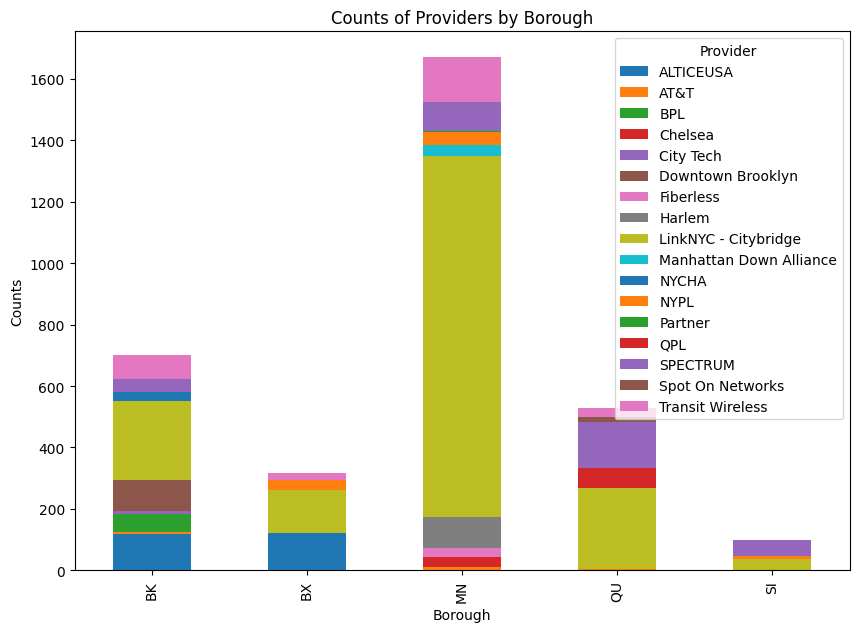

In [39]:
pivot_df = grouped_counts.pivot(index='boro', columns='provider', values='counts')

# Plot the bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Borough')
plt.ylabel('Counts')
plt.title('Counts of Providers by Borough')
plt.legend(title='Provider')
plt.show()

## static map


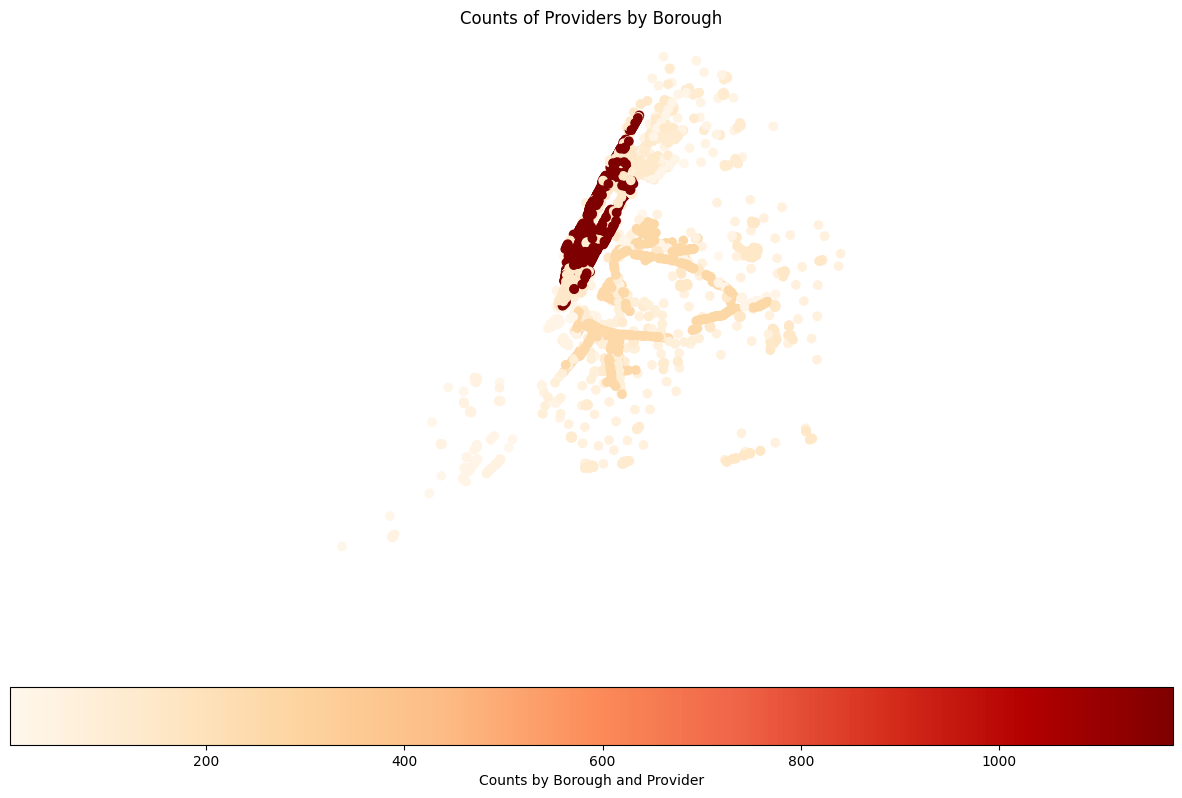

In [44]:
# Load the shapefile
shapefile_path = r'C:\Users\fauxi\OneDrive\Documents\GitHub\cdp-mapping-systems\Data\NYC Wi-Fi Hotspot Locations\geo_export_663c1398-7ec2-4cb6-a417-0912439ca41e.shp'
geo_df = gpd.read_file(shapefile_path)

# Assuming 'boro' and 'provider' are columns in your GeoDataFrame
# Group by 'boro' and 'provider' and count occurrences
grouped_counts = geo_df.groupby(["boro", "provider"]).size().reset_index(name='counts')

# Merge the counts back with the GeoDataFrame
# Ensure 'boro' in grouped_counts matches a column in geo_df (e.g., 'boro_name')
# Adjust the column names as necessary
merged_gdf = geo_df.merge(grouped_counts, on=['boro', 'provider'])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='counts', ax=ax, legend=True, cmap='OrRd',
                legend_kwds={'label': "Counts by Borough and Provider",
                             'orientation': "horizontal"})

# Customize the plot
ax.set_title('Counts of Providers by Borough')
ax.set_axis_off()

plt.show()